In [1]:
# 1. 데이터 불러오기

import pandas as pd

pd.set_option('display.max_columns',500)
pd.options.display.float_format = '{:.5f}'.format
data_path = ('../../data/')
total=pd.read_csv(data_path+'insurance_fraud_detect_data.csv')
train=total[total['test_set']==0].reset_index(drop=True).drop('test_set',axis=1)
test=total[total['test_set']==1].reset_index(drop=True).drop('test_set',axis=1)

#feature, label 나누기
X_train=train.iloc[:,1:]
y_train=train.iloc[:,0]
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

# fraud data 갯수 확인

train_yf=train[train['fraud_YN']==1]
train_nf=train[train['fraud_YN']==0]
test_yf=test[test['fraud_YN']==1]


print(' total : ', total.shape,'\n',
      'columns : ',train.shape[1],'\n',
      'train : ',train.shape,'\n',
      'test : ',test.shape,'\n',
     'train_fraud : ', len(y_train[y_train==1]),'\n',
      'test_fraud : ', len(y_test[y_test==1]))

 total :  (16000, 25) 
 columns :  24 
 train :  (12879, 24) 
 test :  (3121, 24) 
 train_fraud :  34 
 test_fraud :  7


In [3]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=3):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

def get_pd_from_pca(pca_data, cols='cols'):
    return pd.DataFrame(pca_data, columns=cols)

In [71]:
#차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95% 유지하는 데 필요한 최소한의 차원 수
import numpy as np

pca=PCA()
pca.fit(train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1
d
#오 defa도 3차원에 쌉가능이넹, 해봐야겠다

1

In [5]:
import numpy as numpy
def print_variance_ratio(pca):
    print('variance_ratio : ',pca.explained_variance_ratio_)
    print('sum of variance_ratio : ', np.sum(pca.explained_variance_ratio_))
print_variance_ratio(pca)

variance_ratio :  [0.53134721 0.40192938 0.035973   0.02239557 0.00835485]
sum of variance_ratio :  1.0


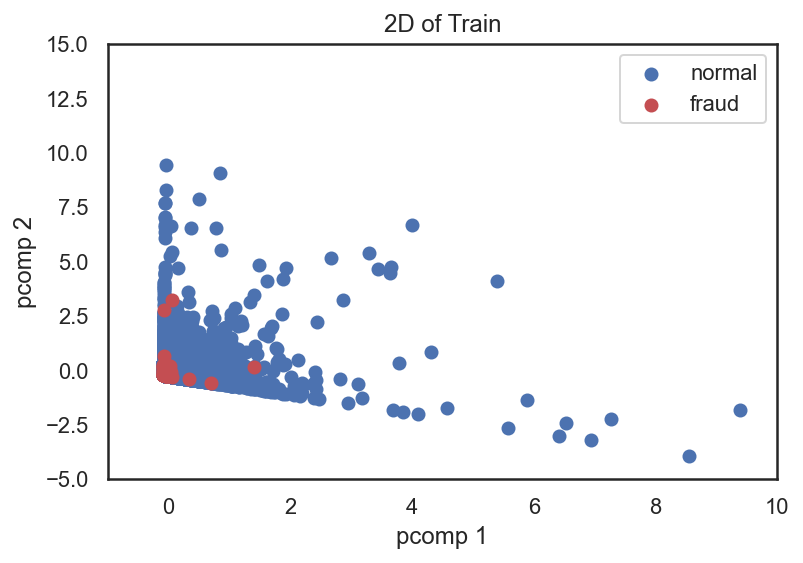

In [52]:
fig, ax = plt.subplots()

ax.scatter(data_pca2_5.iloc[:,0]/1e7, data_pca2_5.iloc[:,1]/1e6, marker='o', label='normal')
ax.scatter(data_pca2_4.iloc[:,0]/1e7, data_pca2_4.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./train_2d.png')
plt.show()


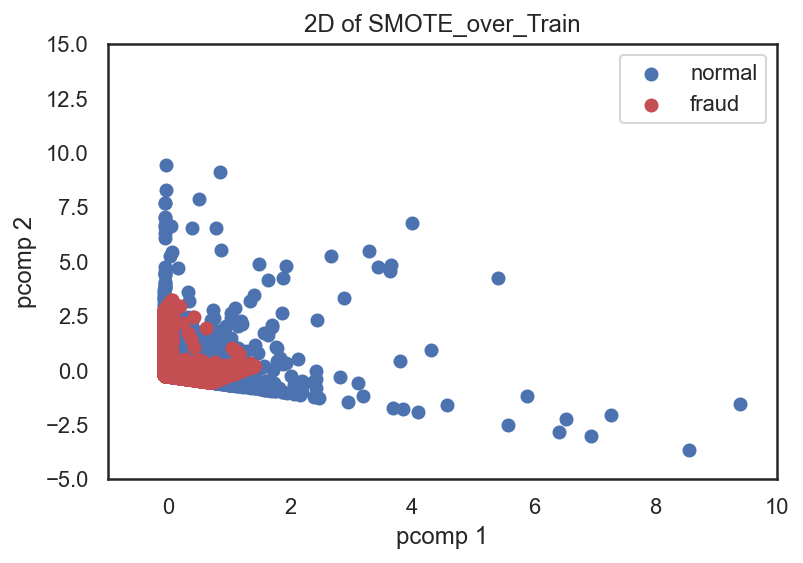

In [149]:
#SMOTE

from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']

# 오버샘플링
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13, k_neighbors=26)
X_train_over, y_train_over = smote.fit_sample(X, y)

pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_1 = pca2_1.fit_transform(X_train_over)

train_over = pd.concat([pd.DataFrame(data_pca2_1), pd.DataFrame(y_train_over)], axis=1)

fraud = train_over[train_over['fraud_YN']==1]
normal = train_over[train_over['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()

ax.scatter(normal.iloc[:,0]/1e7, normal.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud.iloc[:,0]/1e7, fraud.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of SMOTE_over_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./SMOTE_2d.png')
plt.show()

In [136]:
#k-neighbors = 5
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.86831    0.00000 0.00000 0.00000  0.43513
LogisticRegression       0.74688    0.00000 0.00000 0.00000  0.37428
RandomForestClassifier   0.88401    0.00000 0.00000 0.00000  0.44300
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
#k-neighbors = 20
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.81000    0.00170 0.14286 0.00336  0.47718
LogisticRegression       0.18199    0.00235 0.85714 0.00468  0.51881
RandomForestClassifier   0.87248    0.00000 0.00000 0.00000  0.43722
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
#k-neighbors = 30
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.83146    0.00192 0.14286 0.00379  0.48793
LogisticRegression       0.13009    0.00221 0.85714 0.00440  0.49280
RandomForestClassifier   0.89971    0.00000 0.00000 0.00000  0.45087
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
#k-neighbors = 10
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.82730    0.00000 0.00000 0.00000  0.41458
LogisticRegression       0.67831    0.00200 0.28571 0.00397  0.48245
RandomForestClassifier   0.86254    0.00000 0.00000 0.00000  0.43224
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
#k-neighbors = 25
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.84300    0.00206 0.14286 0.00407  0.49372
LogisticRegression       0.15860    0.00228 0.85714 0.00455  0.50709
RandomForestClassifier   0.89426    0.00000 0.00000 0.00000  0.44814
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
#k-neighbors = 27
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.84204    0.00205 0.14286 0.00404  0.49323
LogisticRegression       0.17975    0.00234 0.85714 0.00467  0.51769
RandomForestClassifier   0.90772    0.00000 0.00000 0.00000  0.45488
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
#k-neighbors = 26
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.85229    0.00219 0.14286 0.00432  0.49837
LogisticRegression       0.16725    0.00230 0.85714 0.00460  0.51142
RandomForestClassifier   0.90580    0.00000 0.00000 0.00000  0.45392
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


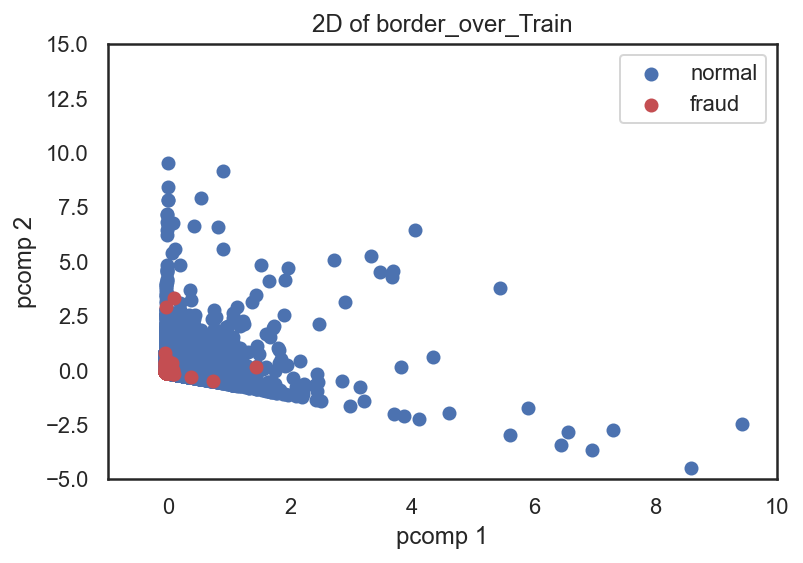

In [133]:
#botherline SMOTE

from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']

# 오버샘플링
from imblearn.over_sampling import BorderlineSMOTE

b_smote = BorderlineSMOTE(random_state=13, k_neighbors=10)
X_train_b_over, y_train_b_over = b_smote.fit_sample(X, y)

pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_b = pca2_1.fit_transform(X_train_b_over)

train_b_over = pd.concat([pd.DataFrame(data_pca2_b), pd.DataFrame(y_train_b_over)], axis=1)

fraud_b = train_b_over[train_b_over['fraud_YN']==1]
normal_b = train_b_over[train_b_over['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()

ax.scatter(normal_b.iloc[:,0]/1e7, normal_b.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud_b.iloc[:,0]/1e7, fraud_b.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of border_over_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
# plt.savefig('./borderSMOTE_2d.png')
plt.show()

In [96]:
y.value_counts()

0    12845
1       34
Name: fraud_YN, dtype: int64

In [122]:
#k-neighbors = 5
results = get_result_pd(models, model_names, X_train_b_over, y_train_b_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.99295    0.00000 0.00000 0.00000  0.49759
LogisticRegression       0.63089    0.00519 0.85714 0.01031  0.74376
RandomForestClassifier   0.99616    0.00000 0.00000 0.00000  0.49920
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
#k-neighbors = 30
results = get_result_pd(models, model_names, X_train_b_over, y_train_b_over, X_test, y_test)
print('success get_result!')
print(results)
#recall이 떨어짐-fraud 샘플링이 잘안되어서 그렇다고 판단할 수 있음

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.95322    0.00000 0.00000 0.00000  0.47768
LogisticRegression       0.74976    0.00638 0.71429 0.01264  0.73206
RandomForestClassifier   0.96540    0.00000 0.00000 0.00000  0.48378
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
#k-neighbors = 10
results = get_result_pd(models, model_names, X_train_b_over, y_train_b_over, X_test, y_test)
print('success get_result!')
print(results)
#recall은 그대로인데, accuracy가 올라감

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98718    0.00000 0.00000 0.00000  0.49470
LogisticRegression       0.65139    0.00549 0.85714 0.01091  0.75404
RandomForestClassifier   0.99455    0.00000 0.00000 0.00000  0.49839
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
#k-neighbors = 15
results = get_result_pd(models, model_names, X_train_b_over, y_train_b_over, X_test, y_test)
print('success get_result!')
print(results)

#어큐러시 떨어짐

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.97116    0.00000 0.00000 0.00000  0.48667
LogisticRegression       0.61487    0.00497 0.85714 0.00988  0.73573
RandomForestClassifier   0.98911    0.00000 0.00000 0.00000  0.49566
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
#k-neighbors = 13
results = get_result_pd(models, model_names, X_train_b_over, y_train_b_over, X_test, y_test)
print('success get_result!')
print(results)

#어큐러시 올라감!

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98334    0.00000 0.00000 0.00000  0.49277
LogisticRegression       0.63249    0.00521 0.85714 0.01035  0.74456
RandomForestClassifier   0.99391    0.00000 0.00000 0.00000  0.49807
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
#k-neighbors = 11
results = get_result_pd(models, model_names, X_train_b_over, y_train_b_over, X_test, y_test)
print('success get_result!')
print(results)

#10이 제일 좋네

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98590    0.00000 0.00000 0.00000  0.49406
LogisticRegression       0.64723    0.00542 0.85714 0.01078  0.75195
RandomForestClassifier   0.99423    0.00000 0.00000 0.00000  0.49823
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


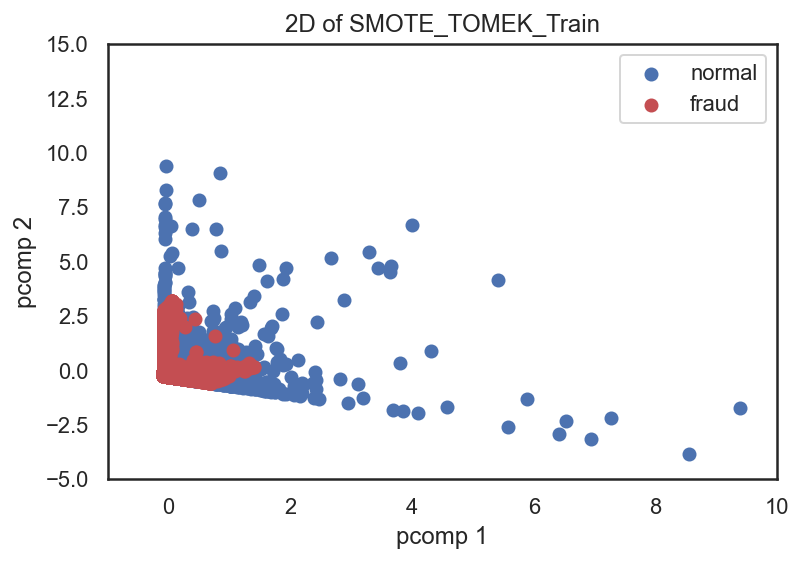

In [25]:
#Tomek

#샘플링

# pipeline을 활용한 오버샘플링 + 언더샘플링 (smote + NearMiss)

from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

X = train.drop('fraud_YN',axis=1)
y = train['fraud_YN']


# define pipeline
over = SMOTE(random_state=13, k_neighbors=30,sampling_strategy=0.5)
under = TomekLinks()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X, y)



pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_b = pca2_1.fit_transform(X_train_mix)

train_tomek = pd.concat([pd.DataFrame(data_pca2_b), pd.DataFrame(y_train_mix)], axis=1)

fraud_t = train_tomek[train_tomek['fraud_YN']==1]
normal_t = train_tomek[train_tomek['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()


ax.scatter(normal_t.iloc[:,0]/1e7, normal_t.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud_t.iloc[:,0]/1e7, fraud_t.iloc[:,1]/1e6, marker='o', label='fraud', color='r')
ax = sns.set_style(style='white')
plt.ylim(top=15,bottom=-5)

# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of SMOTE_TOMEK_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
# plt.savefig('./borderSMOTE_2d.png')
plt.show()



In [114]:
X_train_mix

,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt
0,2,1,3,0,2,0,100,2,0,0,4,2,4,130254.67800,0,1,0,0,1,0,0,0,-1
1,3,1,3,0,4,0,0,2,0,0,3,3,5,1341009.16300,0,3,1,0,1,0,0,0,-1
2,1,0,1,0,1,0,100,1,0,0,1,1,1,524030.56960,1209410,1,0,0,2,0,0,0,-1
3,1,1,3,0,4,0,100,3,0,0,6,3,1,0.00000,1217280,0,0,0,1,1,2,1,2
4,2,0,4,0,4,0,0,1,0,0,4,2,6,0.00000,0,1,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,1,0,3,0,2,0,100,1,0,0,1,3,1,0.00000,2452213,0,0,0,1,1,1,1,1
17909,1,0,1,0,3,0,61,2,0,0,3,1,2,595834.70063,5268541,2,0,0,1,0,1,0,0
17910,1,0,2,0,4,0,100,2,0,0,5,3,1,0.00000,1167706,0,0,0,1,1,2,1,1
17911,2,0,2,0,3,0,100,2,0,0,3,1,4,1341146.79761,369374,1,0,0,2,0,0,0,0


In [26]:
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.90932    0.00360 0.14286 0.00702  0.52695
LogisticRegression       0.98686    0.00000 0.00000 0.00000  0.49454
RandomForestClassifier   0.94938    0.00000 0.00000 0.00000  0.47575
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


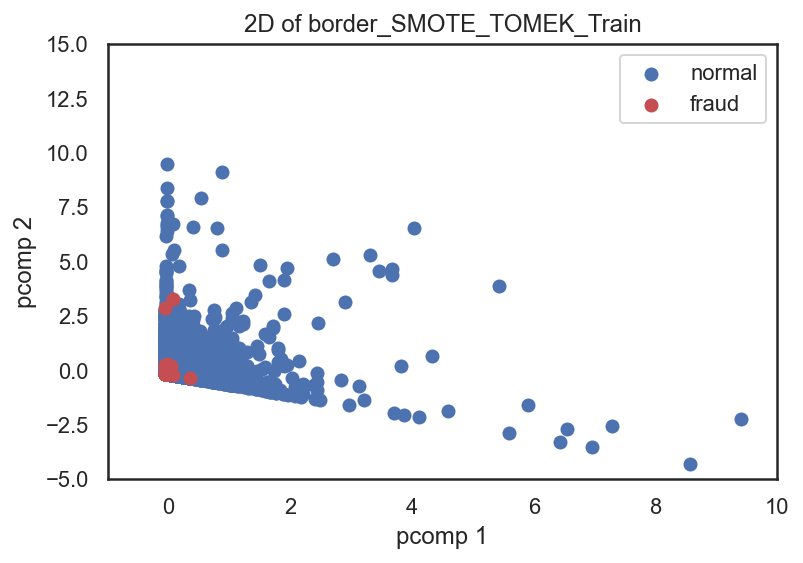

In [67]:
#border + Tomek

#샘플링

# pipeline을 활용한 오버샘플링 + 언더샘플링 (smote + NearMiss)

from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

b_smote = BorderlineSMOTE(random_state=13)
X_train_b_over, y_train_b_over = b_smote.fit_sample(X, y)

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']


# define pipeline
over = BorderlineSMOTE(random_state=13, k_neighbors=10,sampling_strategy=0.5)
under = TomekLinks(sampling_strategy='all')
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X, y)



pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_b = pca2_1.fit_transform(X_train_mix)

train_tomek = pd.concat([pd.DataFrame(data_pca2_b), pd.DataFrame(y_train_mix)], axis=1)

fraud_t = train_tomek[train_tomek['fraud_YN']==1]
normal_t = train_tomek[train_tomek['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()

ax.scatter(normal_t.iloc[:,0]/1e7, normal_t.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud_t.iloc[:,0]/1e7, fraud_t.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of border_SMOTE_TOMEK_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./border_SMOTE_TOMEK_2d.png')
plt.show()



In [14]:
y_train_mix.value_counts()

0    12697
1     6422
Name: fraud_YN, dtype: int64

In [66]:
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

#데이터 셋과 가장 유사하게 샘플링한 게 결과가 더 좋음
#majority만 없애니까 이 결과

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98718    0.00000 0.00000 0.00000  0.49470
LogisticRegression       0.74207    0.00619 0.71429 0.01227  0.72821
RandomForestClassifier   0.99551    0.00000 0.00000 0.00000  0.49888
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)
#둘 다 없애니까 이 결과, accurracy도 떨어지고, recall도 떨어짐

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98718    0.00000 0.00000 0.00000  0.49470
LogisticRegression       0.67414    0.00587 0.85714 0.01166  0.76544
RandomForestClassifier   0.99519    0.00000 0.00000 0.00000  0.49872
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


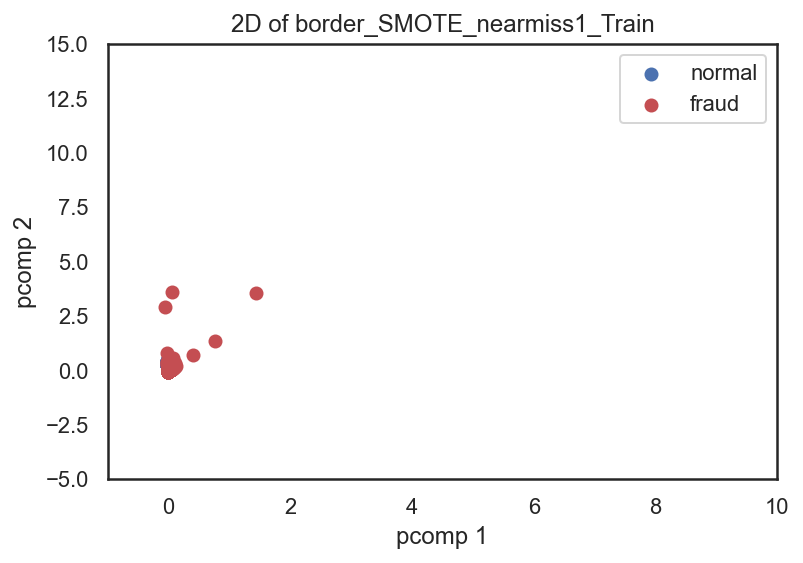

In [62]:
#border + NearMiss

#샘플링

# pipeline을 활용한 오버샘플링 + 언더샘플링 (smote + NearMiss)

from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

b_smote = BorderlineSMOTE(random_state=13)
X_train_b_over, y_train_b_over = b_smote.fit_sample(X, y)

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']


# define pipeline
over = BorderlineSMOTE(random_state=13, k_neighbors=10,sampling_strategy=0.5)
under = NearMiss(version=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X, y)



pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_b = pca2_1.fit_transform(X_train_mix)

train_tomek = pd.concat([pd.DataFrame(data_pca2_b), pd.DataFrame(y_train_mix)], axis=1)

fraud_t = train_tomek[train_tomek['fraud_YN']==1]
normal_t = train_tomek[train_tomek['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()

ax.scatter(normal_t.iloc[:,0]/1e7, normal_t.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud_t.iloc[:,0]/1e7, fraud_t.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of border_SMOTE_nearmiss1_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./border_SMOTE_nearmiss1_2d.png')
plt.show()



In [28]:
y_train_mix.value_counts()

1    6422
0    6422
Name: fraud_YN, dtype: int64

In [29]:
#nearmiss version 1
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.71131    0.00112 0.14286 0.00221  0.42772
LogisticRegression       0.71035    0.00111 0.14286 0.00221  0.42724
RandomForestClassifier   0.97821    0.00000 0.00000 0.00000  0.49021
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#nearmiss version 2
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.58699    0.00387 0.71429 0.00770  0.65050
LogisticRegression       0.67991    0.00598 0.85714 0.01187  0.76833
RandomForestClassifier   0.98943    0.00000 0.00000 0.00000  0.49583
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:178: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


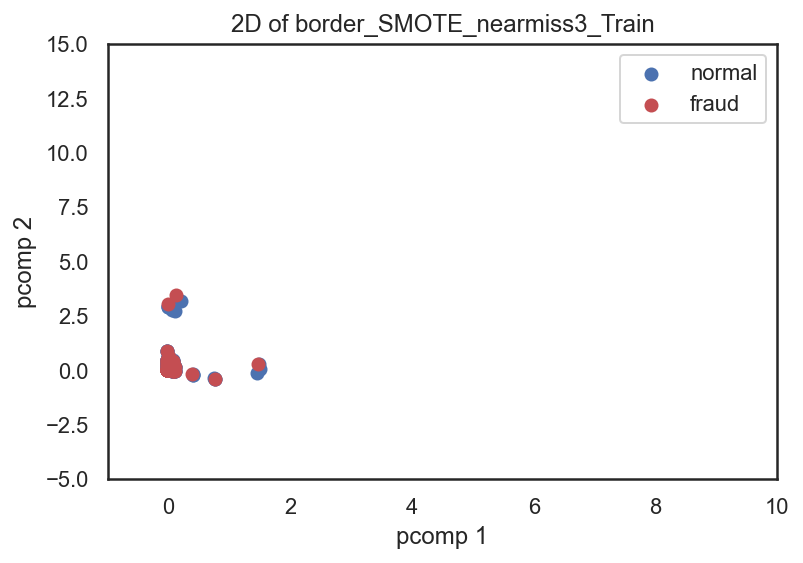

In [61]:
#border + NearMiss

#샘플링

# pipeline을 활용한 오버샘플링 + 언더샘플링 (smote + NearMiss)

from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

b_smote = BorderlineSMOTE(random_state=13)
X_train_b_over, y_train_b_over = b_smote.fit_sample(X, y)

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']


# define pipeline
over = BorderlineSMOTE(random_state=13, k_neighbors=10,sampling_strategy=0.5)
under = NearMiss(version=3)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X, y)



pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_b = pca2_1.fit_transform(X_train_mix)

train_tomek = pd.concat([pd.DataFrame(data_pca2_b), pd.DataFrame(y_train_mix)], axis=1)

fraud_t = train_tomek[train_tomek['fraud_YN']==1]
normal_t = train_tomek[train_tomek['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()

ax.scatter(normal_t.iloc[:,0]/1e7, normal_t.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud_t.iloc[:,0]/1e7, fraud_t.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of border_SMOTE_nearmiss3_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./border_SMOTE_nearmiss3_2d.png')
plt.show()



In [33]:
#nearmiss version 3
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.70042    0.00215 0.28571 0.00426  0.49353
LogisticRegression       0.20314    0.00281 1.00000 0.00560  0.60067
RandomForestClassifier   0.94104    0.00000 0.00000 0.00000  0.47158
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


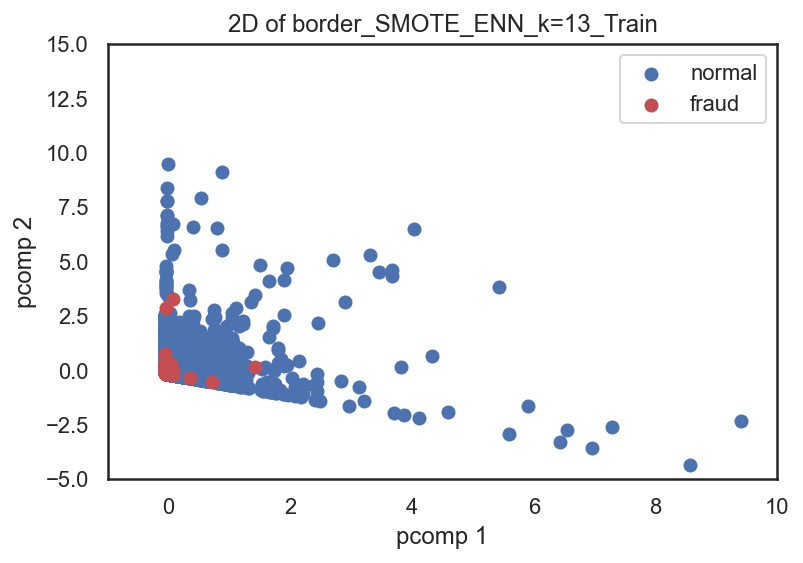

In [58]:
#border + EditedNearestNeighbours

#샘플링

# pipeline을 활용한 오버샘플링 + 언더샘플링 (smote + NearMiss)

from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

b_smote = BorderlineSMOTE(random_state=13)
X_train_b_over, y_train_b_over = b_smote.fit_sample(X, y)

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']


# define pipeline
over = BorderlineSMOTE(random_state=13, k_neighbors=10,sampling_strategy=0.5)
under = EditedNearestNeighbours(n_neighbors=13)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X, y)



pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_b = pca2_1.fit_transform(X_train_mix)

train_tomek = pd.concat([pd.DataFrame(data_pca2_b), pd.DataFrame(y_train_mix)], axis=1)

fraud_t = train_tomek[train_tomek['fraud_YN']==1]
normal_t = train_tomek[train_tomek['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()

ax.scatter(normal_t.iloc[:,0]/1e7, normal_t.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud_t.iloc[:,0]/1e7, fraud_t.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of border_SMOTE_ENN_k=13_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./border_SMOTE_ENN_k=13_2d.png')
plt.show()



In [38]:
#ENN
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98558    0.00000 0.00000 0.00000  0.49390
LogisticRegression       0.71644    0.00563 0.71429 0.01117  0.71536
RandomForestClassifier   0.99487    0.00000 0.00000 0.00000  0.49855
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
#ENN k_neighbors=10
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98558    0.00000 0.00000 0.00000  0.49390
LogisticRegression       0.69561    0.00525 0.71429 0.01042  0.70493
RandomForestClassifier   0.99519    0.00000 0.00000 0.00000  0.49872
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#ENN  k_neighbors=30
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.97629    0.00000 0.00000 0.00000  0.48924
LogisticRegression       0.65780    0.00559 0.85714 0.01111  0.75725
RandomForestClassifier   0.99423    0.00000 0.00000 0.00000  0.49823
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#ENN  k_neighbors=25
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98398    0.00000 0.00000 0.00000  0.49310
LogisticRegression       0.65972    0.00562 0.85714 0.01117  0.75821
RandomForestClassifier   0.99551    0.00000 0.00000 0.00000  0.49888
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#ENN  k_neighbors=20
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98334    0.00000 0.00000 0.00000  0.49277
LogisticRegression       0.66004    0.00563 0.85714 0.01118  0.75837
RandomForestClassifier   0.99359    0.00000 0.00000 0.00000  0.49791
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
#ENN  k_neighbors=17
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98558    0.00000 0.00000 0.00000  0.49390
LogisticRegression       0.66004    0.00563 0.85714 0.01118  0.75837
RandomForestClassifier   0.99519    0.00000 0.00000 0.00000  0.49872
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#ENN  k_neighbors=15
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98558    0.00000 0.00000 0.00000  0.49390
LogisticRegression       0.66037    0.00563 0.85714 0.01119  0.75853
RandomForestClassifier   0.99455    0.00000 0.00000 0.00000  0.49839
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#ENN  k_neighbors=12
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98558    0.00000 0.00000 0.00000  0.49390
LogisticRegression       0.71227    0.00555 0.71429 0.01101  0.71328
RandomForestClassifier   0.99455    0.00000 0.00000 0.00000  0.49839
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
#ENN  k_neighbors=13
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.98558    0.00000 0.00000 0.00000  0.49390
LogisticRegression       0.66741    0.00575 0.85714 0.01143  0.76207
RandomForestClassifier   0.99487    0.00000 0.00000 0.00000  0.49855
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


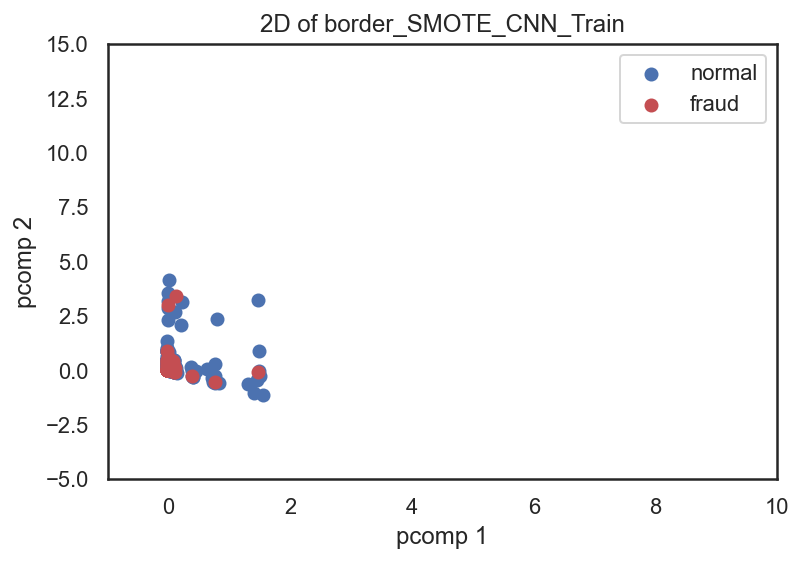

In [69]:
#border + CNN

#샘플링


from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

b_smote = BorderlineSMOTE(random_state=13)
X_train_b_over, y_train_b_over = b_smote.fit_sample(X, y)

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']


# define pipeline
over = BorderlineSMOTE(random_state=13, k_neighbors=10,sampling_strategy=0.5)
under = CondensedNearestNeighbour()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X, y)



pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_b = pca2_1.fit_transform(X_train_mix)

train_tomek = pd.concat([pd.DataFrame(data_pca2_b), pd.DataFrame(y_train_mix)], axis=1)

fraud_t = train_tomek[train_tomek['fraud_YN']==1]
normal_t = train_tomek[train_tomek['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()

ax.scatter(normal_t.iloc[:,0]/1e7, normal_t.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud_t.iloc[:,0]/1e7, fraud_t.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of border_SMOTE_CNN_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./border_SMOTE_CNN_2d.png')
plt.show()



In [70]:
#CNN  
results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.84845    0.00000 0.00000 0.00000  0.42518
LogisticRegression       0.37552    0.00307 0.85714 0.00612  0.61579
RandomForestClassifier   0.97116    0.00000 0.00000 0.00000  0.48667
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
#border + ADASYN

#샘플링


from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

b_smote = BorderlineSMOTE(random_state=13)
X_train_b_over, y_train_b_over = b_smote.fit_sample(X, y)

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']


# define pipeline
over = BorderlineSMOTE(random_state=13, k_neighbors=10,sampling_strategy=0.5)
under = ADASYN()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X, y)



pca2_1 = PCA(n_components=2, random_state=13)
data_pca2_b = pca2_1.fit_transform(X_train_mix)

train_tomek = pd.concat([pd.DataFrame(data_pca2_b), pd.DataFrame(y_train_mix)], axis=1)

fraud_t = train_tomek[train_tomek['fraud_YN']==1]
normal_t = train_tomek[train_tomek['fraud_YN']==0]


# plt.figure(figsize=(12,8))
# plt.scatter(data_pca2_1[:,0]/1e7, data_pca2_1[:,1], c=y_train_over
# )

fig, ax = plt.subplots()

ax.scatter(normal_t.iloc[:,0]/1e7, normal_t.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax.scatter(fraud_t.iloc[:,0]/1e7, fraud_t.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

plt.ylim(top=15,bottom=-5)
# # plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of border_SMOTE_CNN_Train')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./border_SMOTE_CNN_2d.png')
plt.show()



ImportError: cannot import name 'ADASYN' from 'imblearn.under_sampling' (/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/imblearn/under_sampling/__init__.py)

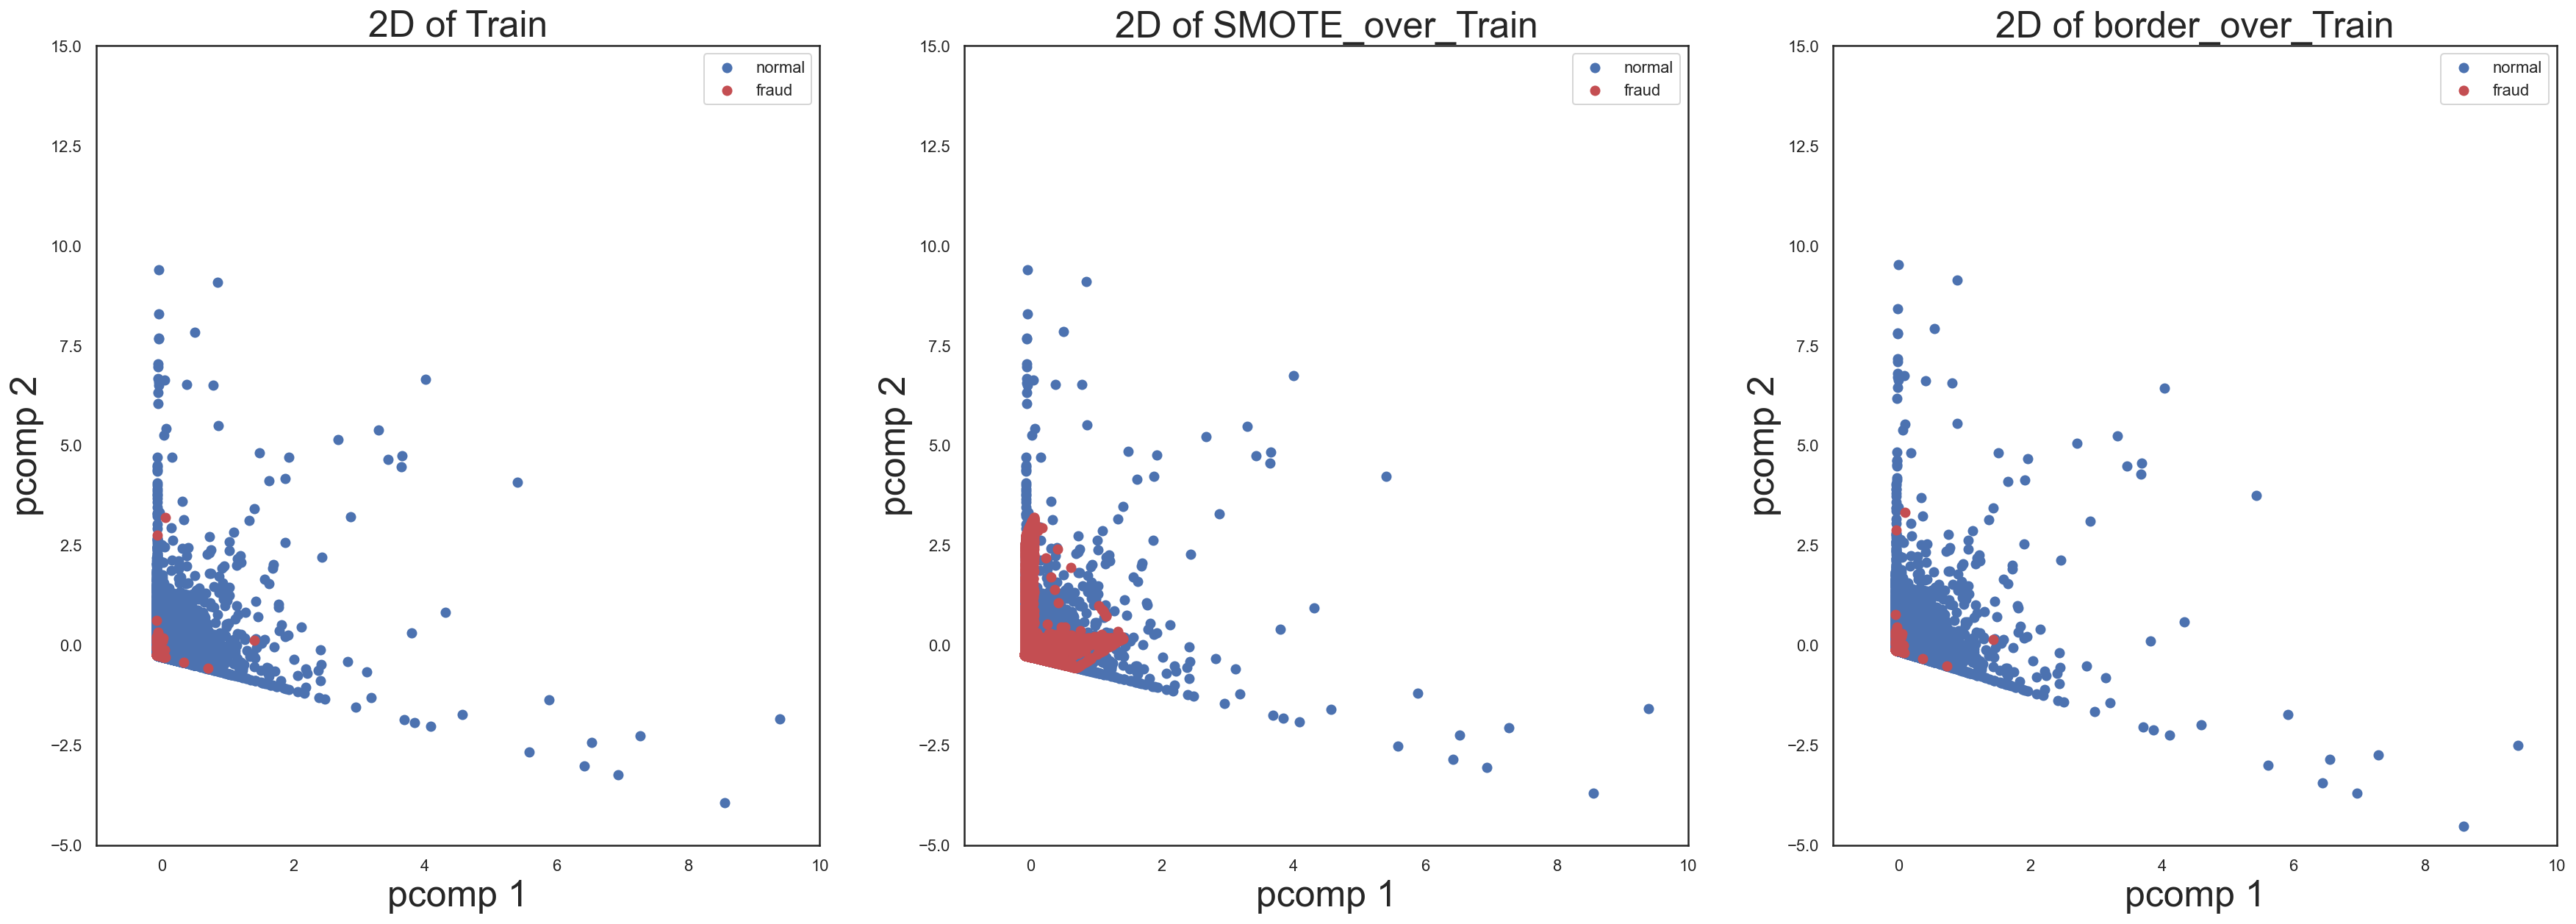

In [151]:
fig = plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=0.7)


ax1 = fig.add_subplot(1,3,1)

ax1.scatter(data_pca2_5.iloc[:,0]/1e7, data_pca2_5.iloc[:,1]/1e6, marker='o', label='normal')
ax1.scatter(data_pca2_4.iloc[:,0]/1e7, data_pca2_4.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

ax1 = plt.ylim(top=15,bottom=-5)
ax1 = plt.xlim(right=10, left=-1)
ax1 = plt.title('2D of Train', size=25)
ax1 = plt.xlabel('pcomp 1',size=25)
ax1 = plt.ylabel('pcomp 2',size=25)
ax1 = plt.legend()
plt.savefig('./train_2d.png')



ax2 = fig.add_subplot(1,3,2)

ax2.scatter(normal.iloc[:,0]/1e7, normal.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax2.scatter(fraud.iloc[:,0]/1e7, fraud.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

ax2 = plt.ylim(top=15,bottom=-5)
ax2 = plt.xlim(right=10, left=-1)
ax2 = plt.title('2D of SMOTE_over_Train',size=25)
ax2 = plt.xlabel('pcomp 1',size=25)
ax2 = plt.ylabel('pcomp 2',size=25)
ax2 = plt.legend()
plt.savefig('./SMOTE_2d.png')




ax3 = fig.add_subplot(1,3,3)

ax3.scatter(normal_b.iloc[:,0]/1e7, normal_b.iloc[:,1]/1e6, marker='o', label='normal',color='b')
ax3.scatter(fraud_b.iloc[:,0]/1e7, fraud_b.iloc[:,1]/1e6, marker='o', label='fraud', color='r')
ax3 = plt.ylim(top=15,bottom=-5)
ax3 = plt.xlim(right=10, left=-1)
ax3 = plt.title('2D of border_over_Train',size=25)
ax3 = plt.xlabel('pcomp 1',size=25)
ax3 = plt.ylabel('pcomp 2',size=25)
ax3 = plt.legend()
plt.savefig('./borderSMOTE_2d.png')








plt.show()

In [ ]:
# 리드미 코드 복붙용

In [ ]:

# fig = plt.figure(figsize=(30,10))


# ax1 = fig.add_subplot(1,3,1)

# ax1.scatter(normal.iloc[:,0]/1e7, normal.iloc[:,1]/1e6, marker='o', label='normal')
# ax1.scatter(fraud.iloc[:,0]/1e7, fraud.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

# ax1 = plt.ylim(top=15,bottom=-5)
# ax1 = plt.xlim(right=10, left=-1)
# ax1 = plt.title('2D of Train', size=25)
# ax1 = plt.xlabel('pcomp 1',size=25)
# ax1 = plt.ylabel('pcomp 2',size=25)
# ax1 = plt.legend()
# plt.savefig('./train_2d.png')



# ax2 = fig.add_subplot(1,3,2)

# ax2.scatter(normal_s.iloc[:,0]/1e7, normal_s.iloc[:,1]/1e6, marker='o', label='normal',color='b')
# ax2.scatter(fraud_s.iloc[:,0]/1e7, fraud_s.iloc[:,1]/1e6, marker='o', label='fraud', color='r')

# ax2 = plt.ylim(top=15,bottom=-5)
# ax2 = plt.xlim(right=10, left=-1)
# ax2 = plt.title('2D of SMOTE_over_Train',size=25)
# ax2 = plt.xlabel('pcomp 1',size=25)
# ax2 = plt.ylabel('pcomp 2',size=25)
# ax2 = plt.legend()
# plt.savefig('./SMOTE_2d.png')




# ax3 = fig.add_subplot(1,3,3)

# ax3.scatter(normal_b.iloc[:,0]/1e7, normal_b.iloc[:,1]/1e6, marker='o', label='normal',color='b')
# ax3.scatter(fraud_b.iloc[:,0]/1e7, fraud_b.iloc[:,1]/1e6, marker='o', label='fraud', color='r')
# ax3 = plt.ylim(top=15,bottom=-5)
# ax3 = plt.xlim(right=10, left=-1)
# ax3 = plt.title('2D of border_over_Train',size=25)
# ax3 = plt.xlabel('pcomp 1',size=25)
# ax3 = plt.ylabel('pcomp 2',size=25)
# ax3 = plt.legend()
# plt.savefig('./borderSMOTE_2d.png')








# plt.show()

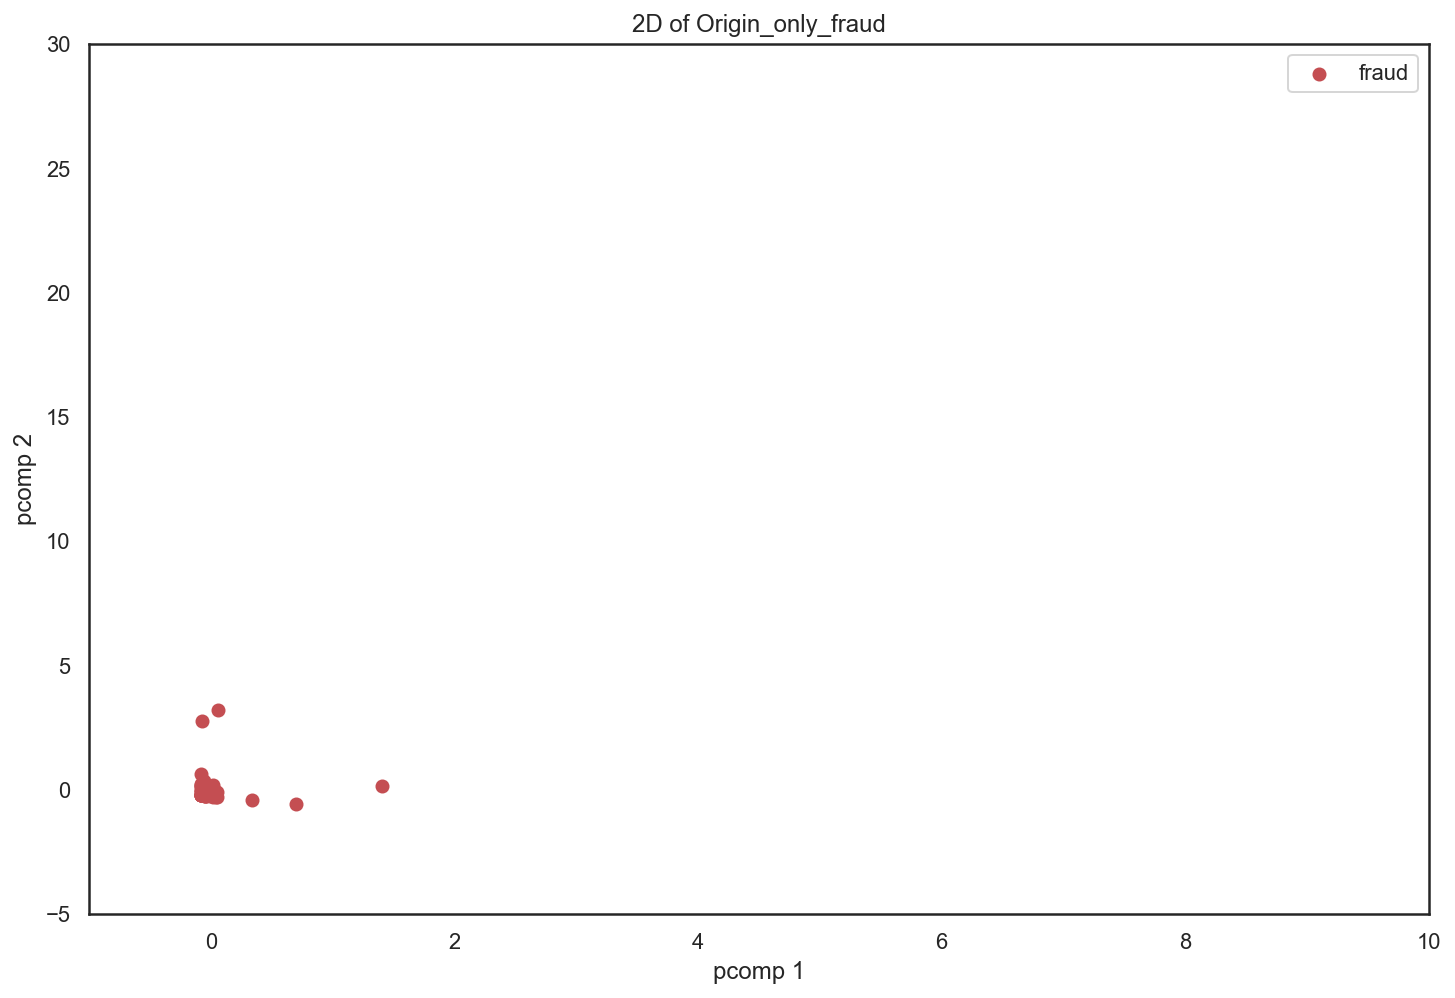

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot
sns.set(style='white')

X = train.drop('fraud_YN', axis=1)
y = train['fraud_YN']

pca2 = PCA(n_components=2, random_state=13)
data_pca2 = pd.DataFrame(pca2.fit_transform(X))

data_pca2['fraud_YN']=pd.DataFrame(y)
data_pca2_4 = data_pca2[data_pca2['fraud_YN']==1].reset_index(drop=True)


plt.figure(figsize=(12,8))
plt.scatter(data_pca2_4.iloc[:,0]/1e7, data_pca2_4.iloc[:,1]/1e6,label='fraud',color='r')
plt.ylim(top=30,bottom=-5)
# plt.xlim(right=10, left=-1)
plt.xlim(right=10, left=-1)
plt.title('2D of Origin_only_fraud')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.savefig('./fraud.png')
plt.show()

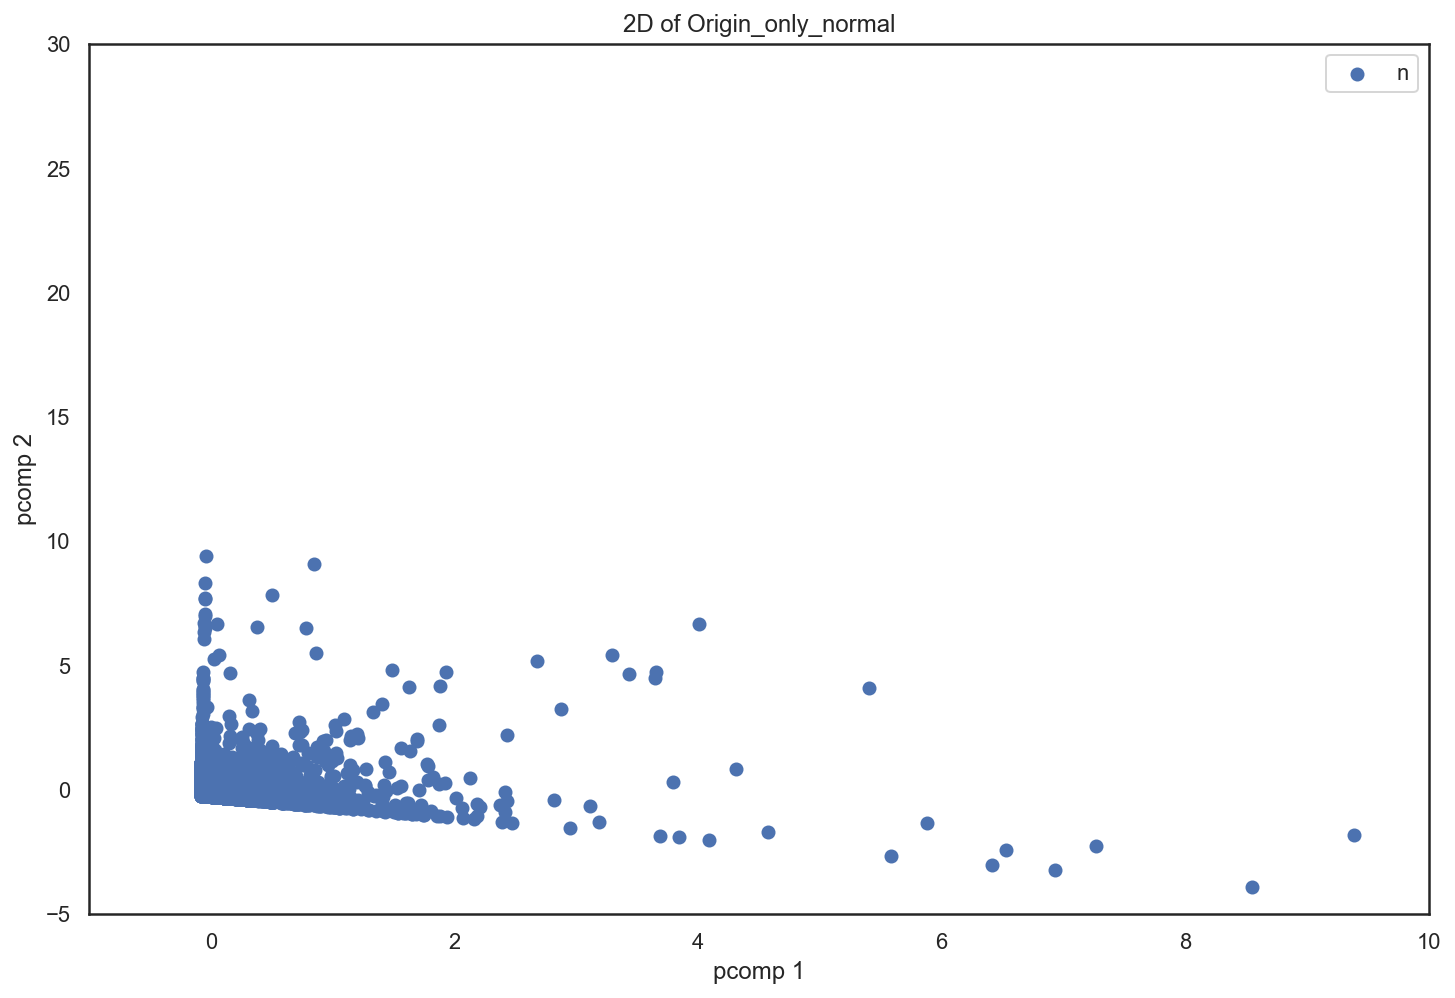

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot

X = train
y = train['fraud_YN']

pca2 = PCA(n_components=2, random_state=13)
data_pca2 = pd.DataFrame(pca2.fit_transform(X))

data_pca2['fraud_YN']=pd.DataFrame(y)
data_pca2_5 = data_pca2[data_pca2['fraud_YN']==0].reset_index(drop=True)


plt.figure(figsize=(12,8))
plt.scatter(data_pca2_5.iloc[:,0]/1e7, data_pca2_5.iloc[:,1]/1e6,color='b')
# plt.scatter(data_pca2_5.iloc[:,0]/1e7, data_pca2_5.iloc[:,1]/1e7)
plt.ylim(top=3*1e1,bottom=-5)
plt.xlim(right=10, left=-1)
plt.title('2D of Origin_only_normal')
plt.legend('normal')
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

In [13]:
# 사용할 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC



dt = DecisionTreeClassifier(max_depth=7, random_state=13)
lr = LogisticRegression(random_state=13, solver='liblinear')
# lr = LogisticRegression(random_state=13, multi_class='multinomial',solver='lbfgs',C=10)
rf = RandomForestClassifier(random_state=13, n_estimators=100, max_depth=6)
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=13), n_estimators=100,
    max_samples=100, bootstrap=False, n_jobs=-1
)
svc = SVC(random_state=19,kernel = 'linear')
lgbm = LGBMClassifier(random_state=13,n_estimators=100, num_leaves=10, n_jobs = -1, boost_from_average=False)

# models = [dt,lr,rf,bag_clf,svc,lgbm]
models = [dt,lr,rf]
# model_names = ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier','BaggingClassifier','SVC','LGBMClassifier','base']
model_names = ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier','base']

In [14]:
#결과 출력 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)


def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred,labels=([0, 2]))
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    
    return acc, pre, re, f1, auc



def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    
    print('=> confusion matrix')
    print(confusion)
    print('==========')
    
    print('Accuracy :{0:.4f} , Precision: {1:.4f}'.format(acc,pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

#모델과 데이터를 주면 성능을 출력하는 함수
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

#다수의 모델의 성능을 정리해서 DataFrame으로 반환
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model,X_train, y_train, X_test, y_test))
        print('success enter {}'.format(model))
    
    # base라인(모두가 정상 데이터)컬럼 추가
    base_pred=np.zeros((len(y_test),1))
    tmp.append(get_clf_eval(y_test, base_pred))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Joint Parameter
random_state = 13
n_jobs = -1

# DecisionTreeClassifier
# dt_criterion = 'gini'  # {“gini”, “entropy”}, default=”gini”
# dt_min_samples_leaf = 1  # int or float, default=1
# dt_max_leaf_nodes = None  # int, default=None
# dt_min_impurity_split = 0  # float, default=0
dt_max_depth = 4  # int, default=None
dt_max_features = 'sqrt'  # int, float or {“auto”, “sqrt”, “log2”}, default=None
weights = {0:0.01, 1:1.0}
dt_class_weight = weights  # dict, list of dict or “balanced”, default=None

In [31]:
# LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_over, y_train_over)
lr_pred = lr_clf.predict(X_test)
print_clf_eval(y_test, lr_pred)


# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=random_state,
                                max_depth=dt_max_depth,
                                max_features=dt_max_features, class_weight=dt_class_weight
                                )
dt_clf.fit(X_train_over, y_train_over)
dt_pred = dt_clf.predict(X_test)
print_clf_eval(y_test, dt_pred)


# RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_over, y_train_over)
rf_pred = rf_clf.predict(X_test)
print_clf_eval(y_test, rf_pred)


# LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train_over, y_train_over)
lgbm_pred = lgbm_clf.predict(X_test)
print_clf_eval(y_test, lgbm_pred)

=> confusion matrix
[[2009 1105]
 [   1    6]]
Accuracy :0.6456 , Precision: 0.0054
Recall: 0.8571, F1: 0.0107, AUC:0.7511
=> confusion matrix
[[2420  694]
 [   0    7]]
Accuracy :0.7776 , Precision: 0.0100
Recall: 1.0000, F1: 0.0198, AUC:0.8886


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy :0.9978 , Precision: 0.0000
Recall: 0.0000, F1: 0.0000, AUC:0.5000
=> confusion matrix
[[3113    1]
 [   7    0]]
Accuracy :0.9974 , Precision: 0.0000
Recall: 0.0000, F1: 0.0000, AUC:0.4998


In [27]:
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
print('success get_result!')
print(results)

success enter DecisionTreeClassifier(max_depth=7, random_state=13)
success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1  roc_auc
DecisionTreeClassifier   0.99295    0.00000 0.00000 0.00000  0.49759
LogisticRegression       0.63089    0.00519 0.85714 0.01031  0.74376
RandomForestClassifier   0.99616    0.00000 0.00000 0.00000  0.49920
base                     0.99776    0.00000 0.00000 0.00000  0.50000


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
y_train_over.value_counts()

1    12845
0    12845
Name: fraud_YN, dtype: int64

----------------------

In [9]:
# 사용할 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC



dt = DecisionTreeClassifier(max_depth=7, random_state=13)
lr = LogisticRegression(random_state=13, solver='liblinear')
# lr = LogisticRegression(random_state=13, multi_class='multinomial',solver='lbfgs',C=10)
rf = RandomForestClassifier(random_state=13, n_estimators=100, max_depth=6)
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=13), n_estimators=100,
    max_samples=100, bootstrap=False, n_jobs=-1
)
svc = SVC(random_state=19,kernel = 'linear')
lgbm = LGBMClassifier(random_state=13,n_estimators=100, num_leaves=10, n_jobs = -1, boost_from_average=False)

# models = [dt,lr,rf,bag_clf,svc,lgbm]
models = [dt,lr,rf]
# model_names = ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier','BaggingClassifier','SVC','LGBMClassifier','base']
model_names = ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier','base']

In [10]:
#결과 출력 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)


def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred,labels=([0, 2]))
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    
    return acc, pre, re, f1, auc



def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    
    print('=> confusion matrix')
    print(confusion)
    print('==========')
    
    print('Accuracy :{0:.4f} , Precision: {1:.4f}'.format(acc,pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

#모델과 데이터를 주면 성능을 출력하는 함수
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

#다수의 모델의 성능을 정리해서 DataFrame으로 반환
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model,X_train, y_train, X_test, y_test))
        print('success enter {}'.format(model))
    
    # base라인(모두가 정상 데이터)컬럼 추가
    base_pred=np.zeros((len(y_test),1))
    tmp.append(get_clf_eval(y_test, base_pred))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)